In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import os

In [2]:
# Step 1: Prepare the dataset
def prepare_data(train_dir, img_size=(224, 224), batch_size=32, validation_split=0.2):
    datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        brightness_range=[0.8, 1.2],
        validation_split=validation_split
    )
    
    train_data = datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )
    
    val_data = datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
    
    return train_data, val_data

In [3]:
# Step 2: Build the model using MobileNetV2 for transfer learning
def build_model(num_classes, input_shape=(224, 224, 3)):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model
    
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')  
    ])
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# Step 3: Train the model
def train_model(model, train_data, val_data, epochs=15):
    history = model.fit(train_data, validation_data=val_data, epochs=epochs)
    return history

In [5]:
# Step 4: Plot training results
def plot_training(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

In [6]:
# Step 5: Save the model
def save_model(model, model_path='defect_detect_model.h5'):
    model.save(model_path)
    print(f"Model saved to {model_path}")

Found 257 images belonging to 2 classes.


Found 64 images belonging to 2 classes.


C:\Users\jaych\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 956ms/step - accuracy: 0.7535 - loss: 0.7676 - val_accuracy: 0.9062 - val_loss: 0.3687
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 627ms/step - accuracy: 0.9275 - loss: 0.1816 - val_accuracy: 0.8750 - val_loss: 0.3257
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 610ms/step - accuracy: 0.9521 - loss: 0.1277 - val_accuracy: 0.9375 - val_loss: 0.3589
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 606ms/step - accuracy: 0.9392 - loss: 0.1538 - val_accuracy: 0.9688 - val_loss: 0.1261
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 621ms/step - accuracy: 0.9588 - loss: 0.1391 - val_accuracy: 0.9688 - val_loss: 0.1468
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 608ms/step - accuracy: 0.9702 - loss: 0.0843 - val_accuracy: 0.9844 - val_loss: 0.1388
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 642ms/step - accuracy: 0.9761 - loss: 0.0548 - val_accuracy: 0.9531 - val_loss: 0.1436
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 644ms/step - accuracy: 0.9937 - loss: 0.0414 - val_accuracy: 0.9844 - val_loss

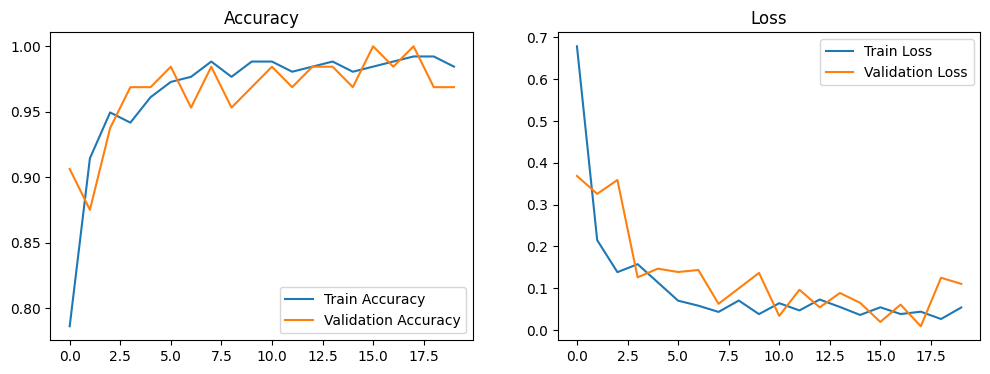

In [9]:
# Main function to run the full pipeline
if __name__ == "__main__":
    # Step 1: Prepare the data
    train_dir = r"C:\Users\jaych\Desktop\Steel\augmented_imgs"
    train_data, val_data = prepare_data(train_dir)

    # Get the number of classes
    num_classes = len(train_data.class_indices)
    class_names = list(train_data.class_indices.keys())

    # Step 2: Build the model
    model = build_model(num_classes)

    # Step 3: Train the model
    history = train_model(model, train_data, val_data, epochs = 20)

    # Step 4: Plot training results
    plot_training(history)



In [10]:
# Step 5: Save the model
save_model(model)

Model saved to defect_detect_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 295ms/step
Accuracy: 0.71875
Classification Report:
              precision    recall  f1-score   support

       Crack       0.38      0.33      0.36        15
        Dent       0.80      0.84      0.82        49

    accuracy                           0.72        64
   macro avg       0.59      0.59      0.59        64
weighted avg       0.71      0.72      0.71        64



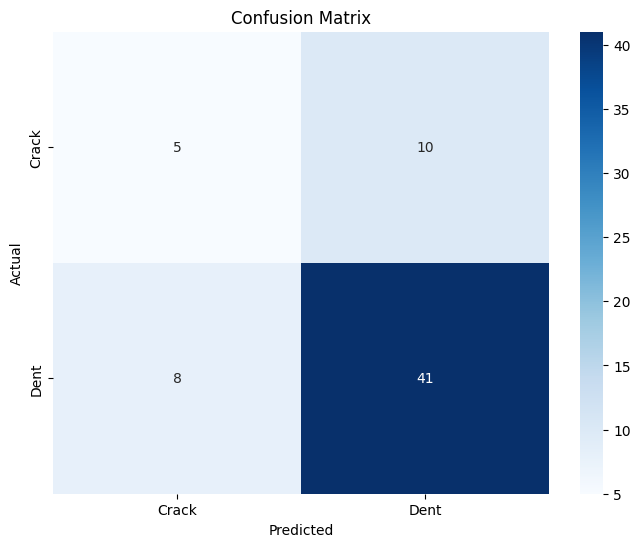

True Positives: 41
False Positives: 10
True Negatives: 5
False Negatives: 8


In [11]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load the trained model
model = load_model('defect_detect_model.h5')

# Step 2: Get the true labels and predicted labels from the validation data
val_data.reset()  # Reset the validation generator to avoid shuffling
y_true = val_data.classes  # True labels from validation data

# Get predicted probabilities from the model
y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions

# Step 3: Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=val_data.class_indices.keys())

# Print the accuracy and classification report (precision, recall, F1-score)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Step 5: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Extract values from confusion matrix (True Positive, False Positive, True Negative, False Negative)
tn, fp, fn, tp = cm.ravel()  # Only works for binary classification. For multiclass, treat the matrix differently.

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")


In [12]:
# Get the number of classes and class names
num_classes = len(train_data.class_indices)
class_names = list(train_data.class_indices.keys())
    
print("Class names: ",class_names)

Class names:  ['Crack', 'Dent']


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import os

# Step 1: Load the saved model
def load_trained_model(model_path='defect_detect_model.h5'):
    model = load_model(model_path)
    return model

# Step 2: Preprocess new image
def preprocess_image(img_path, img_size=(224, 224)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale the image
    return img_array

# Step 3: Make prediction on new image
def predict_new_image(model, img_array, class_names):
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return class_names[predicted_class[0]]

# Main function to test the model on new images
if __name__ == "__main__":
    # Step 1: Load the trained model
    model_path = 'defect_detect_model.h5'
    model = load_trained_model(model_path)

    # Class names from training (should be known from training script)
    class_names = class_names  # Replace with actual claass names

    # Step 2: Preprocess and predict new image
    test_image_path = r"C:\Users\jaych\Desktop\Steel\demo\democ2.jpg"
    img_array = preprocess_image(test_image_path)
    
    # Step 3: Predict class of the image
    predicted_class = predict_new_image(model, img_array, class_names)
    print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: Crack
